<font color='green'> 
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**
12. Bölüm - Makine Öğrenmesi IV - Sınıflandırma Problemleri (340-341. videolar) - Vahit Keskin anlattı. </font>

# Naive Bayes

### İçindekiler

### *Naive Bayes - Teori*
### *Naive Bayes - Model&Tahmin*

**Data Loading**

**Data Preprocessing**
- NaN değer bulunan satırları siliyoruz.
- X ve y değerlerini belirliyoruz.
- Train ve test setlerini ayırma işlemi yapıyoruz.

**Creating Model with Scikit-Learn**

**Tahmin**
- Test setinde bulunan ilk 10 değer için tahmin edilen y değerlerine bakalım.
- y değişkeninin sınıf sayıları arasında dengesizlik durumu söz konusuysa train ve test ayrımına dikkat etmeliyiz.
- Her bir gözlem için y'nin hangi sınıfı hangi olasılıkla tahmin ettiğini görebiliyoruz.
- Test hatasını hesaplıyoruz.
- Naive bayes algoritmasında yine optimize edebileceğimiz dışsal bir parametre/model hiperparametresi yok. Bu yüzden sadece test hatamızı valide ediyoruz.

## <font color='black'>Naive Bayes - Teori </font>

<font color='blue'> Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır. </font>

<font color='blue'> *Kişisel deneyimlerim; özellikle e-ticaret gibi **çok kategorili sınıf yapılarının** olduğu ve burada bazı modelleme çalışmalarına ihtiyaç duyulduğu senaryolarda bayesin iyi çalıştığına yöneliktir. Veya ilgilenilen yanıt değişkeninin çok sınıflı olduğu senaryolarda da ve buna karşılık veri setinde kategorik değişken sayısı da aşağı yukarı sürekli değişken sayısı kadar olduğunda da yine bayes olasılık temelli yaklaşımların iyi çalıştığını deneyimledim. Dolayısıyla eğer veri setiniz, hedef yanıt değişkeniniz çok sınıflıysa mesela 10 tane kategorik değişken sınıfı var ve sınıfların arasında da ayırt edicilik de var (yani onu 2 sınıfa 3 sınıfa indirgeyemiyorsunuz). Buna karşılık değişkenler de incelendiğinde kategorik değişkenlerin sayısı da 1-2 falan değil buralarda belirli ön işleme işlemlerinden sonra bayesin iyi performans verdiğini söyleyebilirim.* </font>

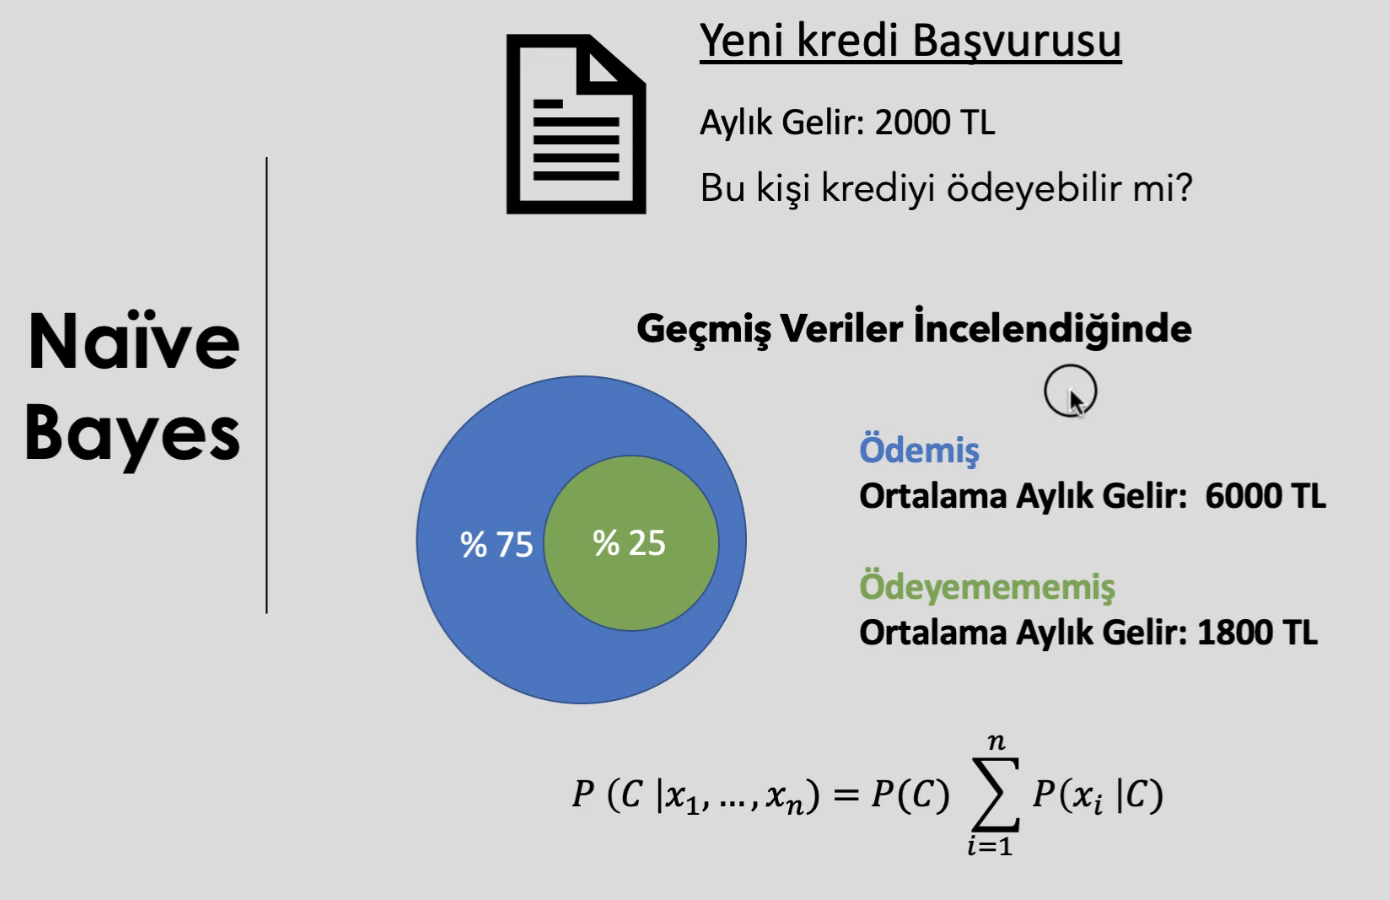

<font color='blue'>Yeni bir kredi başvurusu yapılıyor. Aylık 2000 TL geliri var kişinin. Bu kişi krediyi ödeyebilir mi? Geçmiş veriler incelendiğinde %75-%25 olasılıksal bir durum söz konusu. Mavi kısım %75 borcunu ödemiş, bunun aylık ortalama geliri: 6000 TL. %25 borcunu ödeyememiş, bunun aylık ortalama geliri 1800 TL. Olasılıksal olarak buradan bu sürekli değişkenin bu değeri (aylık ortalama gelir) göz önünde bulundurulduğunda x'in 2000 TL değerini alması durumunda bu kişinin krediyi ödeyip ödeyememesi durumunu buradaki formülle hesaplıyoruz.</font>

## <font color='black'> Naive Bayes - Model & Tahmin </font>

In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Data Loading

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

### Data Preprocessing

#### <font color='green'>NaN değer bulunan satırları siliyoruz.</font>

In [5]:
df = df.dropna()

In [6]:
df.shape

(768, 9)

#### <font color='green'>X ve y değerlerini belirliyoruz.</font>

In [7]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)

#### <font color='green'> Train ve test setlerini ayırma işlemi yapıyoruz.</font>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [9]:
X_train.shape

(537, 8)

In [10]:
X_test.shape

(231, 8)

In [11]:
y_train.shape

(537,)

In [12]:
y_test.shape

(231,)

### Creating Model with Scikit-Learn

In [13]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

<font color='gray'>*Burada prior olasılıklarla ilgili bir bilgi var. Böyle bir parametreyi kullanmıyoruz.*  </font>

### Tahmin

#### <font color='green'>Test setinde bulunan ilk 10 değer için tahmin edilen y değerlerine bakalım.</font>

In [14]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

#### <font color='green'>y değişkeninin sınıf sayıları arasında dengesizlik durumu söz konusuysa train ve test ayrımına dikkat etmeliyiz.</font>

In [15]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

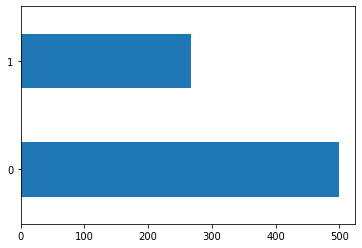

In [16]:
df["Outcome"].value_counts().plot.barh();

<font color='blue'>
Sınıflar arasında böyle dengesizlikler olduğunda; örneğin test ve train olarak ayırdığımızda bu rassallık durumundan dolayı test setinin içerisine zaten az olan (bağımlı değişken) 1 sınıfından biraz daha geldiğinde modeli doğrulamak üzere yapmış olduğumuz test-train ayrımında hiç göz önünde bulunduramayacağımız problemler oluşabilmektedir. Bu sebeple sınıflandırma problemlerinde eğer ilgilendiğiniz bağımlı değişkenin sınıf sayıları arasında bir dengesizlik durumu söz konusu ise bu durumda test-train ayrımı çok çok daha ayrı bir önem kazanmaktadır. Hatta ayırmış olduğumuz test ve train setlerinin içerisindeki bağımlı değişkenin sınıflarının dağılımını mutlaka incelemeniz gerekir. Buna göre test size'ınızı bir gözden geçirip ona göre hareket etmeniz gerekebilir. Buna göre burada bu oran çok çok az olmasa da görece az olduğundan dolayı birazcık teste pay verdik ki (0.25 yerine 0.30) daha sağlıklı bir ölçüm işlemi gerçekleştirebilelim. 
    
</font>

#### <font color='green'>Her bir gözlem için y'nin hangi sınıfı hangi olasılıkla tahmin ettiğini görebiliyoruz.</font>

 <font color='blue'>`nb_model.predict(X_test)[0:10]` ile tahmin etme işlemini gerçekleştirmiştik. Yine benzer şekilde olasılık değerlerine de ulaşabiliyoruz.</font>

In [17]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

 <font color='blue'>İlk sütun 0'a ait olasılıklar, ikincisi 1 sınıfına ait olasılıkları ifade ediyor. </font>

#### <font color='green'>Test hatasını hesaplıyoruz.</font>

In [18]:
y_pred = nb_model.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.7445887445887446

#### <font color='green'>Naive bayes algoritmasında yine optimize edebileceğimiz dışsal bir parametre/model hiperparametresi yok. Bu yüzden sadece test hatamızı valide ediyoruz.  </font>

In [20]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

<font color='blue'>Doğrulanmış test skorumuz 0.775 lojistik regresyonda 0.770 çıkmıştı. Lojistik regresyona göre bir tık daha iyi çıkmış gibi gözüküyor. Çok daha iyisidir gibi bir yorum yapamayız.</font>

<font color='blue'>Bir model tuning işlemi naive bayes için de yapmak söz konusu değil. Dışsal bir hiperparametresi yok. Ancak çalışmadan çalışmaya prior olasılıklar dediğimiz bazı olasılık değerleri var ise bunlar kullanılabilir. Ama böyle bir olasılık değeri yapılan çalışmaların %90-99'unda olmuyor olacak. Dolayısıyla bizim için naive bayes algoritması sadece test sonuçlarının doğrulanarak değerlendirilmesi gereken ve model tuning anlamında aklımıza gelmesi gereken şeyin model doğrulamak olacağı bir algoritma olmuş olacak.  </font>